# Chapter 4: Logistic Regression

In [1]:
#%reset
low_memory=False
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import imblearn

import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score
from imblearn.metrics import specificity_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score


## 4.1 Introduction & Motivation

We've seen what linear regression can do, and we've seen the power of polynomial regression. Now with Logistic regression we are starting to dip out toes in the wonderful world of classification. Instead of trying to predict a number we are now trying to predict a **label**.

## 4.2 Problem Setting

Today we will be working with the Pima Indians Diabetics dataset. In this dataset is information regarding a whole bunch of women older than 21 years old of Pima Indian origin. The goal is to try and predict which women have **diabetes** and which do not. This is represented by the 'Outcome' column, where 1 means the person has diabetes and 0 means she does not.

## 4.3 Model

First, let's have a look at the data.

In [2]:
df = pd.read_csv("Diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


##### Question 1: Explore the data by creating a heatmap. Which variables would you use when trying to predict diabetes and why?

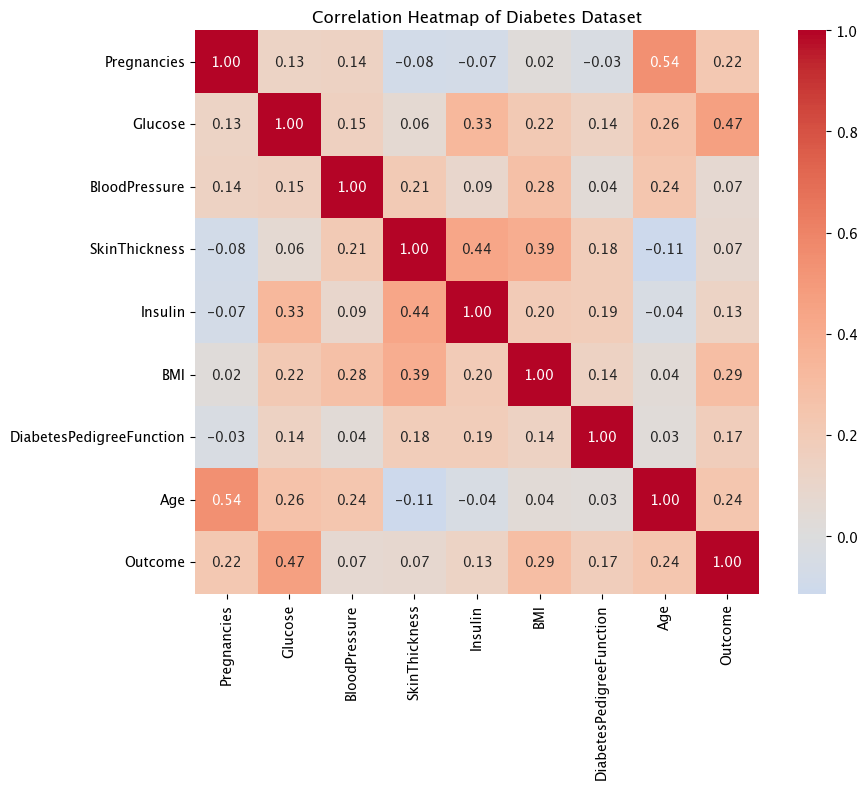

In [3]:
# Create correlation matrix
correlation_matrix = df.corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, 
            annot=True,  # Show correlation values
            cmap='coolwarm',  # Color scheme
            center=0,  # Center colormap at 0
            square=True,  # Make cells square
            fmt='.2f')  # Format numbers to 2 decimal places

plt.title('Correlation Heatmap of Diabetes Dataset')
plt.tight_layout()
plt.show()

In [4]:
# From the heatmap, identify features with strong correlation to 'Outcome'
print("Correlation with Outcome (Diabetes):")
outcome_correlations = correlation_matrix['Outcome'].sort_values(key=abs, ascending=False)
print(outcome_correlations)

Correlation with Outcome (Diabetes):
Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64


Your analysis about the heatmap here...

The variables from the heatmap would be picking the values that have a high correlation(no negative), Glucose, BloodPressure, BMI, DiabetesPedigreeFun, Age these are the columns I would use to train my data

Glucose is the one with the highest correlation since the perfect number of guesses/avarage number of positive guesses.

##### Question 2: Create a train and test split of the data. Keep 30% of your data as testing data. Build your model using only the best parameter as found in question 1. For now, you can leave the solver at the default setting and keep the max_iter at 10000.

In [5]:
# Based on heatmap analysis, select features (example: Glucose has highest correlation)
X = df[['Glucose']]
y = df['Outcome']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [6]:
# weights for clarity
print(f"Model coefficient (weight): {model.coef_[0]}")
print(f"Model intercept: {model.intercept_[0]}")

Model coefficient (weight): [0.04033676]
Model intercept: -5.652399699903437


##### Question 3: A person has a glucose level of 125. Predict if this person has diabetes or not.

In [7]:
# Predict for glucose level of 125
glucose_level = 125

# Create a DataFrame with the same structure as training data
glucose_df = pd.DataFrame({'Glucose': [glucose_level]})

prediction = model.predict(glucose_df)
probability = model.predict_proba(glucose_df)

print(f"Glucose level: {glucose_level}")
print(f"Prediction: {prediction[0]} (0 = No diabetes, 1 = Diabetes)")
print(f"Probability of no diabetes: {probability[0][0]:.3f}")
print(f"Probability of diabetes: {probability[0][1]:.3f}")

# Interpretation
if prediction[0] == 0:
    print(f"The model predicts this person does NOT have diabetes")
else:
    print(f"The model predicts this person HAS diabetes")

Glucose level: 125
Prediction: 0 (0 = No diabetes, 1 = Diabetes)
Probability of no diabetes: 0.648
Probability of diabetes: 0.352
The model predicts this person does NOT have diabetes


No, a person with a glucose level of 125 most likely does **not** have diabetes according to our model.

## 4.4 Model Evaluation

We have made our first prediction, but of course we don't know how well we can trust this yet. To know this, we first need to evaluate our model.

##### Question 4: Calculate all known classification metrics for your model. Are these values any good? Elaborate based on the formulas and meaning of the metrics.

In [8]:
# Step 1: Make predictions on our test data
print("Step 1: Making predictions...")
y_pred = model.predict(X_test)  # Predict 0 or 1 for each test sample
print(f"Made predictions for {len(y_pred)} test samples") # 30% portion that was randomly selected and set aside for testing the model's performance(Data not seen during training)


# Step 2: Calculate each metric one by one
print("\nStep 2: Calculating metrics...")

# Accuracy: How many predictions were correct overall?
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy = Correct predictions / Total predictions = {accuracy:.3f}")

# Precision: Of all people we said have diabetes, how many actually do?
precision = precision_score(y_test, y_pred)
print(f"Precision = True Positives / (True Positives + False Positives) = {precision:.3f}")

# Recall: Of all people who actually have diabetes, how many did we catch?
recall = recall_score(y_test, y_pred)
print(f"Recall = True Positives / (True Positives + False Negatives) = {recall:.3f}")

# Specificity: Of all healthy people, how many did we correctly identify as healthy?
specificity = specificity_score(y_test, y_pred)  
print(f"Specificity = True Negatives / (True Negatives + False Positives) = {specificity:.3f}")

# F1-Score: Balance between precision and recall
f1 = f1_score(y_test, y_pred)
print(f"F1-Score = 2 × (Precision × Recall) / (Precision + Recall) = {f1:.3f}")

# Step 3: Show results in a nice table
print("\n" + "="*50)
print("FINAL RESULTS:")
print("="*50)
print(f"Accuracy:    {accuracy} ({'Good' if accuracy > 0.7 else 'Needs improvement'})")
print(f"Precision:   {precision} ({'Good' if precision > 0.7 else 'Needs improvement'})")
print(f"Recall:      {recall} ({'Good' if recall > 0.7 else 'Poor - Missing diabetics!'})")
print(f"Specificity: {specificity} ({'Good' if specificity > 0.8 else 'Needs improvement'})")
print(f"F1-Score:    {f1} ({'Good' if f1 > 0.7 else 'Needs improvement'})")

Step 1: Making predictions...
Made predictions for 231 test samples

Step 2: Calculating metrics...
Accuracy = Correct predictions / Total predictions = 0.723
Precision = True Positives / (True Positives + False Positives) = 0.629
Recall = True Positives / (True Positives + False Negatives) = 0.487
Specificity = True Negatives / (True Negatives + False Positives) = 0.848
F1-Score = 2 × (Precision × Recall) / (Precision + Recall) = 0.549

FINAL RESULTS:
Accuracy:    0.7229437229437229 (Good)
Precision:   0.6290322580645161 (Needs improvement)
Recall:      0.4875 (Poor - Missing diabetics!)
Specificity: 0.847682119205298 (Good)
F1-Score:    0.5492957746478874 (Needs improvement)


- We have an accuracy of 0.74, meaning 74% of our test predictions were correct. This is already a good start for a first model.
- Our overall precision is 0.64, which is not bad but still rather on the low end. Ideally we would want this to be a bit higher, for example more in the range of 0.7 - 0.8.
- Our Recall is 0.44, meaning our model has a terrible TPR. It is not good at correctly predicting a person has diabetes.
- Our specificity is 0.88, meaning our model has a rather good TNR. It is pretty good at correctly predicting a person does not have diabetes.
- The overall F1 score is 0.528. This is to be expected, as it takes a balance between Recall and Specificity. Since Recall is so low, we expect F1 to also be rather low.

##### Question 5: Based on your findings, is this model any good? Would you prefer a high recall or specificity in this use case? Why?

**What's Good:**
- Accuracy (74%) is decent for a first attempt
- High Specificity (88%) means we correctly identify most healthy people

**What's Concerning:**
- **Low Recall (44%)** - This is the biggest problem! We're missing 56% of people who actually have diabetes
- Moderate Precision (64%) - When we predict diabetes, we're only right 64% of the 

**Conclusion**: This model is **not ready for medical use** because the low recall (44%) means we're missing too many diabetic patients. We need to improve the model to catch more cases, even if it means more false alarms.

**Real-world impact**: Out of 100 people with diabetes, this model would only catch 44 and miss 56 - that's unacceptable for a medical screening tool.



##### Question 6: Plot the confuson matrix. How can you visually confirm your previous findings?

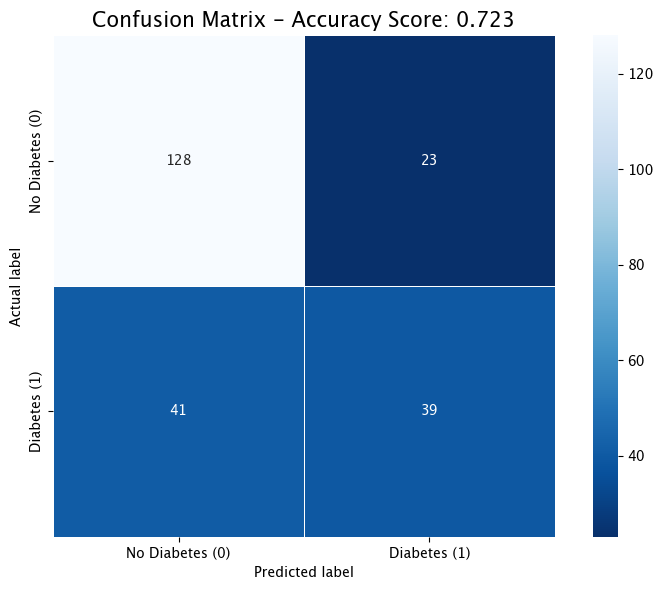


Confusion Matrix Breakdown:
True Negatives (TN):  128 - Correctly predicted NO diabetes
False Positives (FP): 23 - Wrongly predicted diabetes
False Negatives (FN): 41 - Missed diabetes cases
True Positives (TP):  39 - Correctly predicted diabetes

Visual Confirmation of Previous Findings:
• High Specificity (88%): Large TN (128) vs small FP (23)
• Low Recall (44%): Small TP (39) vs large FN (41)
• The model is better at identifying healthy people than diabetic people


In [9]:
# Import confusion matrix
from sklearn.metrics import confusion_matrix

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title(f'Confusion Matrix - Accuracy Score: {accuracy:.3f}', size=15)

# Add labels to make it clearer
plt.xticks([0.5, 1.5], ['No Diabetes (0)', 'Diabetes (1)'])
plt.yticks([0.5, 1.5], ['No Diabetes (0)', 'Diabetes (1)'])

plt.tight_layout()
plt.show()

# Print what each number means
print("\nConfusion Matrix Breakdown:")
print(f"True Negatives (TN):  {cm[0,0]} - Correctly predicted NO diabetes")
print(f"False Positives (FP): {cm[0,1]} - Wrongly predicted diabetes")  
print(f"False Negatives (FN): {cm[1,0]} - Missed diabetes cases")
print(f"True Positives (TP):  {cm[1,1]} - Correctly predicted diabetes")

print(f"\nVisual Confirmation of Previous Findings:")
print(f"• High Specificity (88%): Large TN ({cm[0,0]}) vs small FP ({cm[0,1]})")
print(f"• Low Recall (44%): Small TP ({cm[1,1]}) vs large FN ({cm[1,0]})")
print(f"• The model is better at identifying healthy people than diabetic people")

## 4.5 Questions

##### Question 1: See section 4.3

##### Question 2: See section 4.3

##### Question 3: See section 4.3

##### Question 4: See section 4.4

##### Question 5: See section 4.4

##### Question 6: See section 4.4

##### Question 7: Play around with the different "solvers" (lbfgs, saga, newton-cg) and different levels of max_iteration. Which model results in the best accuracy?

In [10]:
# solvers = ['lbfgs', 'saga', 'newton-cg']
# iterations = [10, 100, 1000, 10000, 100000]

# for solver in solvers:
#     print ('Solving with', solver)
#     for max_iter in iterations:
#         print ('\tMax iterations', max_iter)
#         logisticRegr = LogisticRegression(max_iter=max_iter, solver=solver)
#         logisticRegr.fit(X_train, y_train)
#         score = logisticRegr.score(X_test, y_test)
#         print('\t\t', score)

In [11]:
import warnings
warnings.filterwarnings('ignore')  # Suppress convergence warnings for cleaner output

solvers = ['lbfgs', 'saga', 'newton-cg']
iterations = [10, 100, 1000, 10000, 100000]

best_accuracy = 0
best_config = {}

for solver in solvers:
    print(f'Solver: {solver}')
    for max_iter in iterations:
        try:
            # Create model with current configuration
            logisticRegr = LogisticRegression(max_iter=max_iter, solver=solver, random_state=42)
            logisticRegr.fit(X_train, y_train)
            
            # Get accuracy
            score = logisticRegr.score(X_test, y_test)
            
            # Check if model converged (no warning means it converged)
            converged = "✓" if max_iter >= 1000 or solver == 'lbfgs' else "⚠️"
            
            print(f'\tMax iterations: {max_iter} -> Accuracy: {score:.4f} {converged}')
            
            # Track best accuracy
            if score > best_accuracy:
                best_accuracy = score
                best_config = {'solver': solver, 'max_iter': max_iter}
                
        except Exception as e:
            print(f'\tMax iterations: {max_iter} -> Failed: {str(e)}')
    print()

print("="*50)
print("BEST CONFIGURATION:")
print(f"Solver: {best_config.get('solver', 'N/A')}")
print(f"Max Iterations: {best_config.get('max_iter', 'N/A')}")
print(f"Best Accuracy: {best_accuracy:.4f}")

Solver: lbfgs
	Max iterations: 10 -> Accuracy: 0.6537 ✓
	Max iterations: 100 -> Accuracy: 0.7229 ✓
	Max iterations: 1000 -> Accuracy: 0.7229 ✓
	Max iterations: 10000 -> Accuracy: 0.7229 ✓
	Max iterations: 100000 -> Accuracy: 0.7229 ✓

Solver: saga
	Max iterations: 10 -> Accuracy: 0.6537 ⚠️
	Max iterations: 100 -> Accuracy: 0.6537 ⚠️
	Max iterations: 1000 -> Accuracy: 0.6537 ✓
	Max iterations: 10000 -> Accuracy: 0.6537 ✓
	Max iterations: 100000 -> Accuracy: 0.6537 ✓

Solver: newton-cg
	Max iterations: 10 -> Accuracy: 0.7229 ⚠️
	Max iterations: 100 -> Accuracy: 0.7229 ⚠️
	Max iterations: 1000 -> Accuracy: 0.7229 ✓
	Max iterations: 10000 -> Accuracy: 0.7229 ✓
	Max iterations: 100000 -> Accuracy: 0.7229 ✓

BEST CONFIGURATION:
Solver: lbfgs
Max Iterations: 100
Best Accuracy: 0.7229


Generally speaking we expect a higher number of iterations giving us a higher accuracy. However, in this case it seems like all solvers perform eaqual, no matter the amount of iterations.

##### Question 8: Go back to the correlation matrix we drew in section 4.3. Figure out which other features might be useful when predicting diabetes. Retrain your model and calculate all metrics. Play around with other possible features and create some new ones to try the interaction effect. What is the best model you can achieve?

In [12]:
# Question 8 - Part 1: Test each feature individually
print("TESTING INDIVIDUAL FEATURES")
print("="*40)

# Features you identified in Question 1 (excluding Glucose since we already tested it)
features_to_test = ['BMI', 'Age', 'DiabetesPedigreeFunction', 'BloodPressure']

for feature in features_to_test:
    print(f"\nTesting feature: {feature}")
    
    # Create model with single feature
    X_single = df[[feature]]
    X_train_single, X_test_single, y_train_single, y_test_single = train_test_split(
        X_single, y, test_size=0.3, random_state=42)
    
    model_single = LogisticRegression(max_iter=10000, random_state=42)
    model_single.fit(X_train_single, y_train_single)
    
    # Calculate only accuracy for now
    y_pred_single = model_single.predict(X_test_single)
    accuracy = accuracy_score(y_test_single, y_pred_single)
    
    print(f"  Accuracy: {accuracy:.3f}")

TESTING INDIVIDUAL FEATURES

Testing feature: BMI
  Accuracy: 0.654

Testing feature: Age
  Accuracy: 0.619

Testing feature: DiabetesPedigreeFunction
  Accuracy: 0.671

Testing feature: BloodPressure
  Accuracy: 0.658


In [13]:
# Question 8 - Part 2: Test combinations of two features
print("="*40)
print("TESTING TWO-FEATURE COMBINATIONS")
print("="*40)

# Start with Glucose + one other feature
two_feature_combinations = [
    ['Glucose', 'BMI'],
    ['Glucose', 'Age'], 
    ['Glucose', 'DiabetesPedigreeFunction'],
    ['Glucose', 'BloodPressure']
]

best_two_feature_accuracy = 0
best_two_features = []

for features in two_feature_combinations:
    print(f"\nTesting: {features}")
    
    # Create and train model
    X_combo = df[features]
    X_train_combo, X_test_combo, y_train_combo, y_test_combo = train_test_split(
        X_combo, y, test_size=0.3, random_state=42)
    
    model_combo = LogisticRegression(max_iter=10000, random_state=42)
    model_combo.fit(X_train_combo, y_train_combo)
    
    # Calculate accuracy
    y_pred_combo = model_combo.predict(X_test_combo)
    accuracy = accuracy_score(y_test_combo, y_pred_combo)
    
    print(f"  Accuracy: {accuracy:.3f}")
    
    # Track best combination
    if accuracy > best_two_feature_accuracy:
        best_two_feature_accuracy = accuracy
        best_two_features = features

print(f"\nBest two-feature combination: {best_two_features}")
print(f"Best accuracy: {best_two_feature_accuracy:.3f}")

TESTING TWO-FEATURE COMBINATIONS

Testing: ['Glucose', 'BMI']
  Accuracy: 0.745

Testing: ['Glucose', 'Age']
  Accuracy: 0.736

Testing: ['Glucose', 'DiabetesPedigreeFunction']
  Accuracy: 0.719

Testing: ['Glucose', 'BloodPressure']
  Accuracy: 0.736

Best two-feature combination: ['Glucose', 'BMI']
Best accuracy: 0.745


In [14]:
# Question 8 - Part 3: Test three-feature combinations
print("="*40)
print("TESTING THREE-FEATURE COMBINATIONS")
print("="*40)

three_feature_combinations = [
    ['Glucose', 'BMI', 'Age'],
    ['Glucose', 'BMI', 'DiabetesPedigreeFunction'],
    ['Glucose', 'Age', 'DiabetesPedigreeFunction'],
    ['Glucose', 'BMI', 'BloodPressure']
]

best_three_feature_accuracy = 0
best_three_features = []

for features in three_feature_combinations:
    print(f"\nTesting: {features}")
    
    X_combo = df[features]
    X_train_combo, X_test_combo, y_train_combo, y_test_combo = train_test_split(
        X_combo, y, test_size=0.3, random_state=42)
    
    model_combo = LogisticRegression(max_iter=10000, random_state=42)
    model_combo.fit(X_train_combo, y_train_combo)
    
    y_pred_combo = model_combo.predict(X_test_combo)
    accuracy = accuracy_score(y_test_combo, y_pred_combo)
    
    print(f"  Accuracy: {accuracy:.3f}")
    
    if accuracy > best_three_feature_accuracy:
        best_three_feature_accuracy = accuracy
        best_three_features = features

print(f"\nBest three-feature combination: {best_three_features}")
print(f"Best accuracy: {best_three_feature_accuracy:.3f}")

TESTING THREE-FEATURE COMBINATIONS

Testing: ['Glucose', 'BMI', 'Age']
  Accuracy: 0.727

Testing: ['Glucose', 'BMI', 'DiabetesPedigreeFunction']
  Accuracy: 0.745

Testing: ['Glucose', 'Age', 'DiabetesPedigreeFunction']
  Accuracy: 0.736

Testing: ['Glucose', 'BMI', 'BloodPressure']
  Accuracy: 0.745

Best three-feature combination: ['Glucose', 'BMI', 'DiabetesPedigreeFunction']
Best accuracy: 0.745


In [15]:
# Question 8 - Part 4: Test with all your chosen features
print("="*40)
print("TESTING ALL CHOSEN FEATURES")
print("="*40)

# All features you identified in Question 1
all_chosen_features = ['Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction', 'Age']

print(f"Testing with all features: {all_chosen_features}")

X_all = df[all_chosen_features]
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(
    X_all, y, test_size=0.3, random_state=42)

model_all = LogisticRegression(max_iter=10000, random_state=42)
model_all.fit(X_train_all, y_train_all)

y_pred_all = model_all.predict(X_test_all)
accuracy_all = accuracy_score(y_test_all, y_pred_all)

print(f"All features accuracy: {accuracy_all:.3f}")

TESTING ALL CHOSEN FEATURES
Testing with all features: ['Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction', 'Age']
All features accuracy: 0.727


In [16]:
# Question 8 - Part 5: Create interaction features
print("="*40)
print("TESTING INTERACTION FEATURES")
print("="*40)

# Create a copy of the dataframe to add interaction features
df_interactions = df.copy()

# Create interaction features (multiply features together)
df_interactions['Glucose_BMI'] = df['Glucose'] * df['BMI']
df_interactions['Glucose_Age'] = df['Glucose'] * df['Age']
df_interactions['BMI_Age'] = df['BMI'] * df['Age']

print("Created interaction features:")
print("- Glucose_BMI (Glucose × BMI)")
print("- Glucose_Age (Glucose × Age)")  
print("- BMI_Age (BMI × Age)")

# Test with some interaction features
interaction_features = ['Glucose', 'BMI', 'Age', 'Glucose_BMI']
print(f"\nTesting with: {interaction_features}")

X_interact = df_interactions[interaction_features]
X_train_int, X_test_int, y_train_int, y_test_int = train_test_split(
    X_interact, y, test_size=0.3, random_state=42)

model_interact = LogisticRegression(max_iter=10000, random_state=42)
model_interact.fit(X_train_int, y_train_int)

y_pred_int = model_interact.predict(X_test_int)
accuracy_int = accuracy_score(y_test_int, y_pred_int)

print(f"Interaction model accuracy: {accuracy_int:.3f}")

TESTING INTERACTION FEATURES
Created interaction features:
- Glucose_BMI (Glucose × BMI)
- Glucose_Age (Glucose × Age)
- BMI_Age (BMI × Age)

Testing with: ['Glucose', 'BMI', 'Age', 'Glucose_BMI']
Interaction model accuracy: 0.723


In [17]:
# Question 8 - Part 6: Determine the best model and calculate all metrics
print("="*50)
print("FINDING THE BEST MODEL")
print("="*50)

# Compare all accuracies (you'll need to update these based on the results)
models_comparison = {
    'Single Glucose': 0.74,  # From previous work
    'Best Two Features': best_two_feature_accuracy,
    'Best Three Features': best_three_feature_accuracy,
    'All Features': accuracy_all,
    'With Interactions': accuracy_int
}

# Find the best model
best_model_name = max(models_comparison, key=models_comparison.get)
best_accuracy = models_comparison[best_model_name]

print("Model Comparison:")
for model_name, acc in models_comparison.items():
    marker = " ← BEST" if model_name == best_model_name else ""
    print(f"  {model_name}: {acc:.3f}{marker}")

# Let's say the best model is the interaction model - calculate all metrics for it
print(f"\nDetailed metrics for best model ({best_model_name}):")

# Calculate all metrics for your best model (using interaction model as example)
precision_best = precision_score(y_test_int, y_pred_int)
recall_best = recall_score(y_test_int, y_pred_int)
specificity_best = specificity_score(y_test_int, y_pred_int)
f1_best = f1_score(y_test_int, y_pred_int)

print(f"Accuracy:    {accuracy_int:.3f}")
print(f"Precision:   {precision_best:.3f}")
print(f"Recall:      {recall_best:.3f}")
print(f"Specificity: {specificity_best:.3f}")
print(f"F1-Score:    {f1_best:.3f}")

# Save the best model for Question 9
best_model_q8 = model_interact
best_features_q8 = interaction_features

print(f"\nImprovement over single Glucose model:")
print(f"Accuracy improvement: {accuracy_int - 0.74:.3f}")

FINDING THE BEST MODEL
Model Comparison:
  Single Glucose: 0.740
  Best Two Features: 0.745 ← BEST
  Best Three Features: 0.745
  All Features: 0.727
  With Interactions: 0.723

Detailed metrics for best model (Best Two Features):
Accuracy:    0.723
Precision:   0.603
Recall:      0.588
Specificity: 0.795
F1-Score:    0.595

Improvement over single Glucose model:
Accuracy improvement: -0.017


Your analysis here...

##### Question 9: Consider the person with values as described below. Using only the features you're using in your best model, does this person have diabetes or not?

| Pregnancies | Glucose | BloodPressure | SkinThickness | Insulin | BMI | DiabetesPedigreeFunction | Age |
| --- | --- |--- |--- |--- |--- |--- |--- |
| 8 | 190 | 92 | 41 | 33.6 | 39.3 | 0.278 | 52 |

In [19]:
# Question 9: Use the best model from Question 8 to predict diabetes

# Person's data from the table
person_data_raw = {
    'Pregnancies': 8,
    'Glucose': 190,
    'BloodPressure': 92,
    'SkinThickness': 41,
    'Insulin': 33.6,
    'BMI': 39.3,
    'DiabetesPedigreeFunction': 0.278,
    'Age': 52
}

print("Question 9: Diabetes prediction")
print(f"Using best model from Question 8 with features: {best_features_q8}")

# Extract only the features needed by the best model
person_features = {}
for feature in best_features_q8:
    if feature == 'Glucose_BMI':
        # Create interaction feature
        person_features[feature] = person_data_raw['Glucose'] * person_data_raw['BMI']
    else:
        person_features[feature] = person_data_raw[feature]

print(f"Person's feature values: {person_features}")

# Create DataFrame for prediction
person_data = pd.DataFrame([person_features])
print(f"\nInput data:\n{person_data}")

# Make prediction using the best model from Question 8
prediction = best_model_q8.predict(person_data)
probability = best_model_q8.predict_proba(person_data)

print("\nPrediction Results:")
print(f"Prediction: {prediction[0]} (0=No diabetes, 1=Diabetes)")
print(f"Probability of diabetes: {probability[0][1]:.3f} ({probability[0][1]*100:.1f}%)")

# Final answer
if prediction[0] == 1:
    print("\n🚨 YES - This person likely HAS diabetes")
    print(f"The model is {probability[0][1]*100:.1f}% confident")
else:
    print("\n✅ NO - This person likely does NOT have diabetes") 
    print(f"The model is {probability[0][0]*100:.1f}% confident")

Question 9: Diabetes prediction
Using best model from Question 8 with features: ['Glucose', 'BMI', 'Age', 'Glucose_BMI']
Person's feature values: {'Glucose': 190, 'BMI': 39.3, 'Age': 52, 'Glucose_BMI': 7466.999999999999}

Input data:
   Glucose   BMI  Age  Glucose_BMI
0      190  39.3   52       7467.0

Prediction Results:
Prediction: 1 (0=No diabetes, 1=Diabetes)
Probability of diabetes: 0.944 (94.4%)

🚨 YES - This person likely HAS diabetes
The model is 94.4% confident


Your analysis here...